# Задание 1
Загрузка файла HR.csv в Pandas datafame


In [ ]:
#Подгружаем все необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pandas as pd


In [ ]:
# Откроем датасет
HR = pd.read_csv('HR.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Задание 2
Расчет основных статистик для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
#Рассчитаем статистику для количественных данных
HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
#Рассчитаем статистики для категориальных данных (в т.ч. бинарных)
print(HR['Work_accident'].value_counts())
print(HR['Work_accident'].mode()[0])
print(HR['Work_accident'].unique())

0    12830
1     2169
Name: Work_accident, dtype: int64
0
[0 1]


In [ ]:
print(HR['left'].value_counts())
print(HR['left'].mode()[0])
print(HR['left'].unique())

0    11428
1     3571
Name: left, dtype: int64
0
[1 0]


In [ ]:
print(HR['promotion_last_5years'].value_counts())
print(HR['promotion_last_5years'].mode()[0])
print(HR['promotion_last_5years'].unique())

0    14680
1      319
Name: promotion_last_5years, dtype: int64
0
[0 1]


In [ ]:
print(HR['department'].value_counts())
print(HR['department'].mode()[0])
print(HR['department'].unique())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
sales
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [ ]:
print(HR['salary'].value_counts())
print(HR['salary'].mode()[0])
print(HR['salary'].unique())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
low
['low' 'medium' 'high']


# Задание 3
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

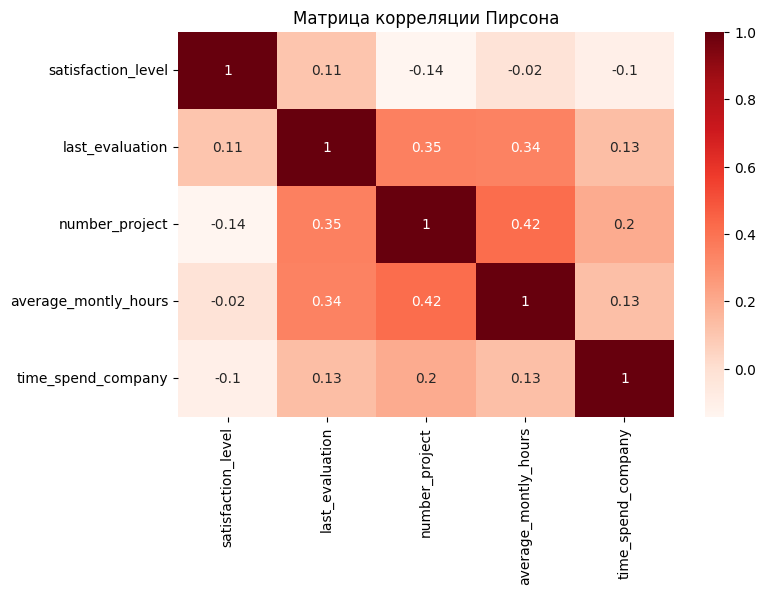

In [ ]:
corr_matrix_pearson = HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()


На основании данной информации, мы видим, что самыми скоррелированными переменными являются number_project и average_montly_hours. При большем количестве проектов, среднее количество часов на рабочем месте в месяц выше.

Самые нескоррелированные переменнны - average_montly_hours и satisfaction_level.
Среднее количество часов на рабочем месте в месяц практически никак не коррелируется с удовлетворенностью работой, т.к. коэффицент корреляции близок к 0.

# Задание 4
Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [ ]:
HR['department'].value_counts()


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# Задание 5
Показать распределение сотрудников по зарплатам

In [ ]:

#Посчитаем количество сотрудников по уровню зарплаты
HR['salary'].value_counts(normalize = True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

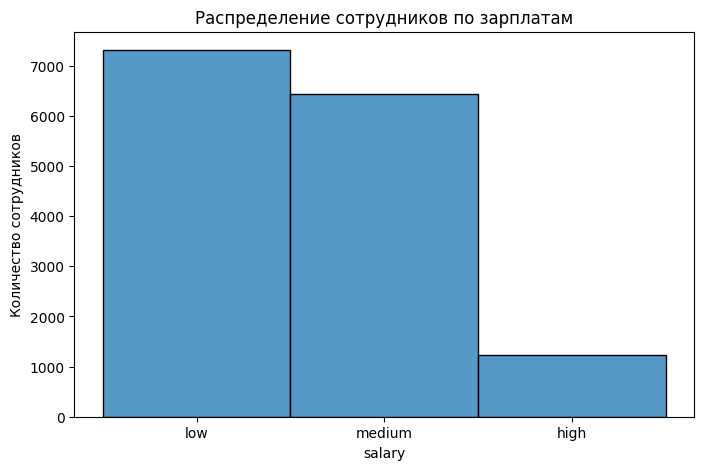

In [ ]:
#Визуализируем распределение сотрудников
plt.figure(figsize=[8,5])
sns.histplot(data=HR, x="salary", bins=40)
plt.title("Распределение сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()

# Задание 5
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
#Сгруппируем уровню зарплат сотрудников по департаментам
HR_dep = HR.groupby('department')['salary'].value_counts()
HR_dep

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

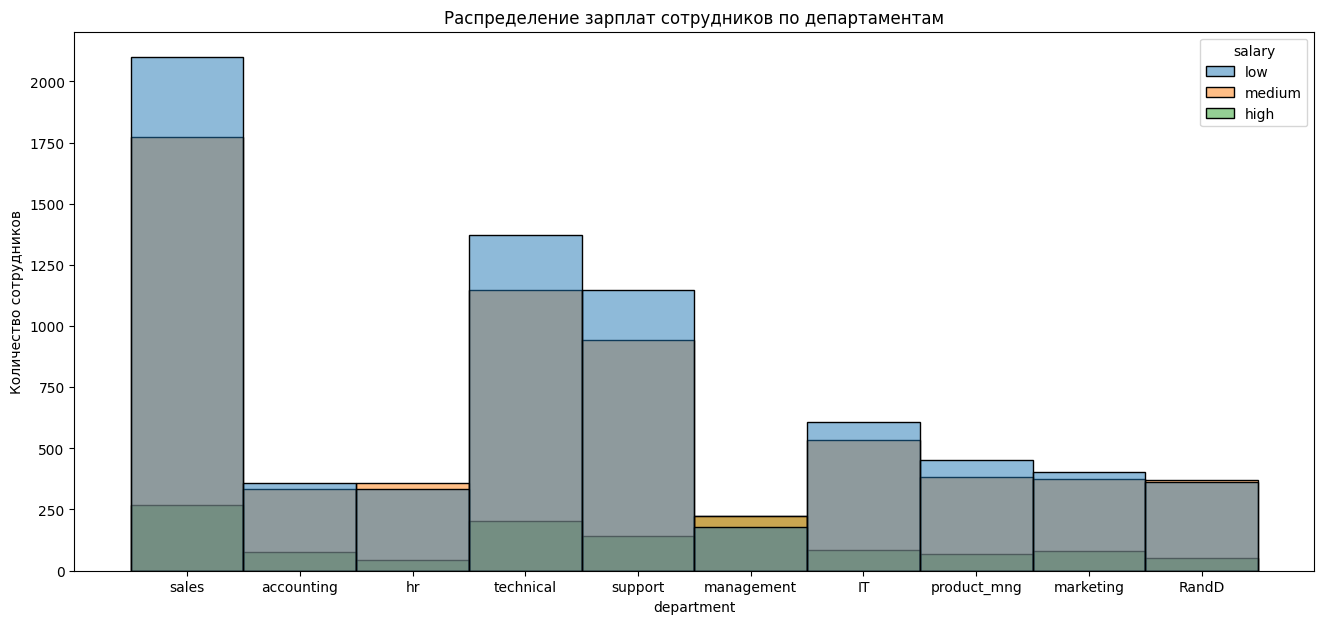

In [ ]:
#Проведем визуализацию
plt.figure(figsize=[16,7])
sns.histplot(data = HR, x ="department", hue ='salary', bins=20)
plt.title("Распределение зарплат сотрудников по департаментам")
plt.ylabel("Количество сотрудников")
plt.show()

# **Задание 7**
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
#Разделим время на рабочем месте для сотрудников с выскоим и низким окладом
high_salary = HR.loc[HR['salary'] == 'high']['average_montly_hours'].value_counts()
low_salary = HR.loc[HR['salary'] == 'low']['average_montly_hours'].value_counts()

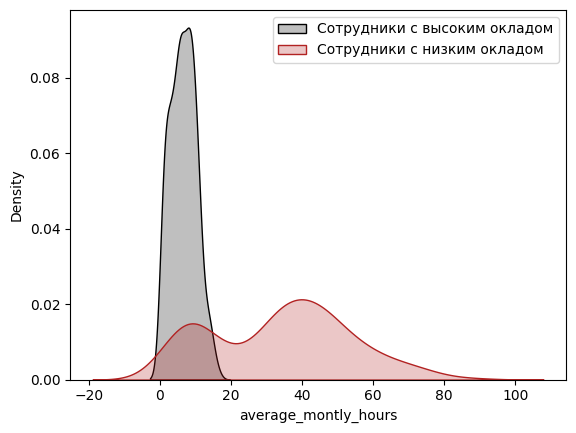

In [ ]:
#Визуализируем графики распределения времени на рабочем месте для сотрудников разных окладов
sns.kdeplot(high_salary, label="Сотрудники с высоким окладом", fill = True, color = '#000000')
sns.kdeplot(low_salary, label="Сотрудники с низким окладом", fill = True, color = '#B22222')
plt.legend()
plt.show()

Проверим, нормальное ли распределение по рабочему времени ?

In [ ]:
stat, p = st.shapiro(high_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.96626, p = 0.00016
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(low_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.96071, p = 0.00001
Вероятно не нормальное распределение


Распределение ненормальное, поэтому будем использовать критерий Манна-Уитни

In [ ]:
stat, p = st.mannwhitneyu(high_salary, low_salary)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 3932.00000, p = 0.0000000000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


**Вывод:**  Тест показал наличие статистической разницы - гипотеза не подтердилась. Статистика показала обратное - сотрудники с низким окладом проводят на рабочем месте в среднем больше времени, чем с высоким.

# **Задание 8**
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов


Доли уволившихся и не уволившихся сотрудников с повышением за последние 5 лет

In [ ]:
left_employees = HR.loc[HR['left'] == 1] #уволившиеся сотрудники
unleft_employees = HR.loc[HR['left'] == 0] #не уволившиеся сотрудники

In [ ]:
l_p = left_employees.loc[left_employees['promotion_last_5years'] == 1]['promotion_last_5years'].count()  #количество уволившихся сотрудников у которых
                                                                                                   #было повышение последние 5 лет

ul_p = unleft_employees.loc[unleft_employees['promotion_last_5years'] == 1]['promotion_last_5years'].count()  #количество не уволившихся сотрудников у которых
                                                                                                       #было повышение последние 5 лет
print(l_p/left_employees['left'].count()*100)  # доля уволивишхся сотрудников с повышением за последние 5 лет

print(ul_p/unleft_employees['left'].count()*100)  # доля неуволивишхся сотрудников с повышением за последние 5 лет


0.5320638476617194
2.6251312565628284


Средняя степень удовлетворенности для уволившихся и не уволившихся сотрудников

In [ ]:
HR.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов для уволившихся и не уволившихся сотрудников

In [ ]:
round(HR.groupby('left')['number_project'].mean()) #округляем до целого числа

left
0    4.0
1    4.0
Name: number_project, dtype: float64

# **Задание 9**
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки.

In [ ]:
#Разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X = HR[['satisfaction_level',	'last_evaluation',	'number_project',
        'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years']]
y = HR['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
len(y_test)

3750

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [ ]:
#Обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [ ]:
result

,y_test,y_pred
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
10371,0,0
12541,1,0
2656,0,0
6759,0,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#расчет точности
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

Качество модели составляет порядка 75%.